<a href="https://colab.research.google.com/github/Ash100/Minor/blob/main/logomaker-rough.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install biopython logomaker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 49.4 MB/s eta 0:00:00


In [2]:
from Bio import AlignIO

# Load your alignment file
alignment = AlignIO.read("/content/rpoB-aligned.fas", "fasta")

In [3]:
import pandas as pd

# Convert the alignment to a DataFrame
alignment_df = pd.DataFrame([list(record.seq) for record in alignment],
                            index=[record.id for record in alignment])

In [8]:
num_cols_per_line = 70  # Number of columns (positions) per line

In [ ]:
import logomaker
import matplotlib.pyplot as plt

# Calculate the frequency of each base at each position
counts_df = alignment_df.apply(lambda col: col.value_counts(), axis=0).fillna(0)

# Set up the figure
num_lines = (alignment_df.shape[1] + num_cols_per_line - 1) // num_cols_per_line
fig, axes = plt.subplots(num_lines, 1, figsize=(num_cols_per_line * 0.25, num_lines * 2))

for i, ax in enumerate(axes):
    start = i * num_cols_per_line
    end = min(start + num_cols_per_line, alignment_df.shape[1])

    # Generate the sequence logo for this segment
    logomaker.Logo(counts_df.T.iloc[start:end], ax=ax, color_scheme="classic")

    ax.set_title(f"Positions {start + 1} to {end}")
    ax.set_xlabel("Position")
    ax.set_ylabel("Frequency")

    # Adjust font size for clarity
    ax.tick_params(axis='x', labelsize=8)
    ax.tick_params(axis='y', labelsize=10)

plt.tight_layout()
plt.show()

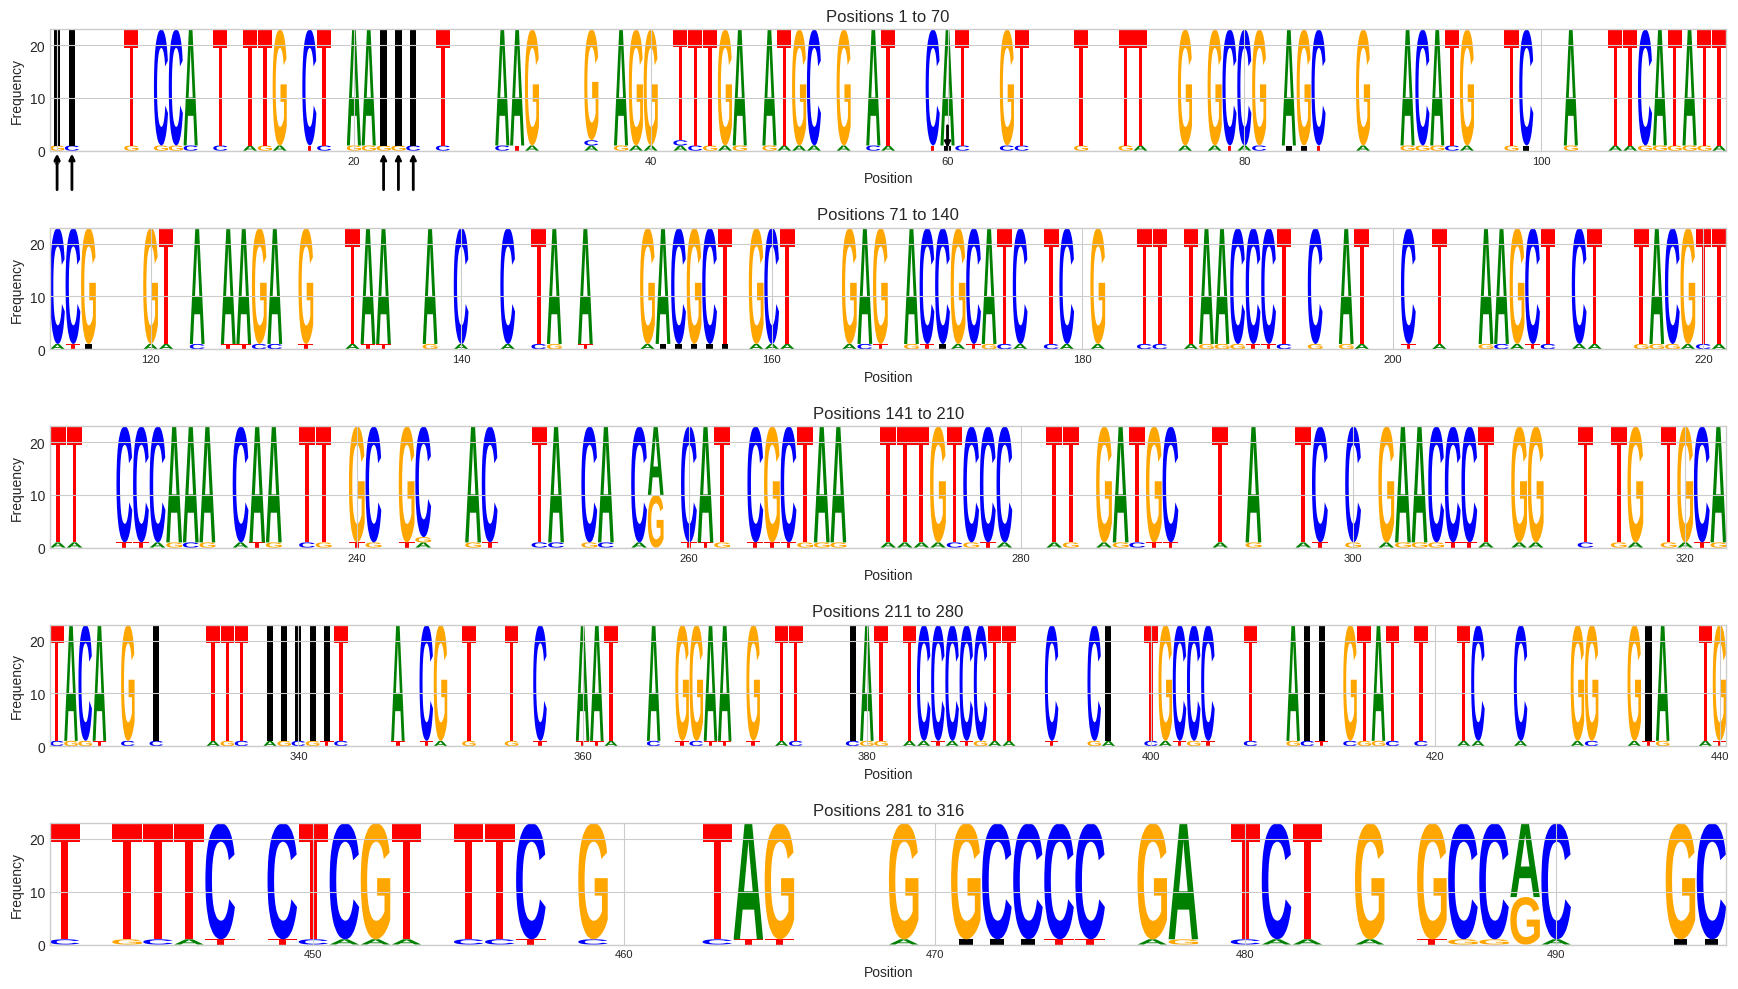

In [19]:
import logomaker
import matplotlib.pyplot as plt
import numpy as np

# Define the number of columns (positions) per line
num_cols_per_line = 70

# Calculate the frequency of each base at each position
counts_df = alignment_df.apply(lambda col: col.value_counts(), axis=0).fillna(0)

# Identify the first sequence
first_seq = alignment_df.iloc[0]

# Identify conserved positions (positions where all sequences have the same base)
conserved_positions = (alignment_df.nunique() == 1) & (alignment_df.apply(lambda x: x.unique()[0] != '-', axis=0))

# Filter counts_df to exclude conserved positions
filtered_counts_df = counts_df.loc[:, ~conserved_positions]

# Set up the figure
num_lines = (filtered_counts_df.shape[1] + num_cols_per_line - 1) // num_cols_per_line
fig, axes = plt.subplots(num_lines, 1, figsize=(num_cols_per_line * 0.25, num_lines * 2))

for i, ax in enumerate(axes):
    start = i * num_cols_per_line
    end = min(start + num_cols_per_line, filtered_counts_df.shape[1])

    # Generate the sequence logo for this segment
    logomaker.Logo(filtered_counts_df.T.iloc[start:end], ax=ax, color_scheme="classic")

    ax.set_title(f"Positions {start + 1} to {end}")
    ax.set_xlabel("Position")
    ax.set_ylabel("Frequency")

    # Annotate insertions and deletions in the first sequence
    for pos in range(start, end):
        if pos < len(first_seq):
            ref_base = first_seq.iloc[pos]
            if ref_base == "-":
                # Red arrow for deletions
                ax.annotate("", xy=(pos - start, 0), xytext=(0, 20),
                            textcoords="offset points", ha='center', fontsize=8,
                            arrowprops=dict(facecolor='red', arrowstyle="->", lw=2))
            elif ref_base != "-":
                num_inserts = alignment_df.iloc[:, pos].value_counts().get("-", 0)
                if num_inserts > 0:
                    # Green arrow for insertions
                    ax.annotate("", xy=(pos - start, 0), xytext=(0, -30),
                                textcoords="offset points", ha='center', fontsize=8,
                                arrowprops=dict(facecolor='green', arrowstyle="->", lw=2))

    # Adjust font size for clarity
    ax.tick_params(axis='x', labelsize=8)
    ax.tick_params(axis='y', labelsize=10)

plt.tight_layout()
plt.savefig("logo_plot_with_indels.png", dpi=600, bbox_inches='tight')
plt.show()

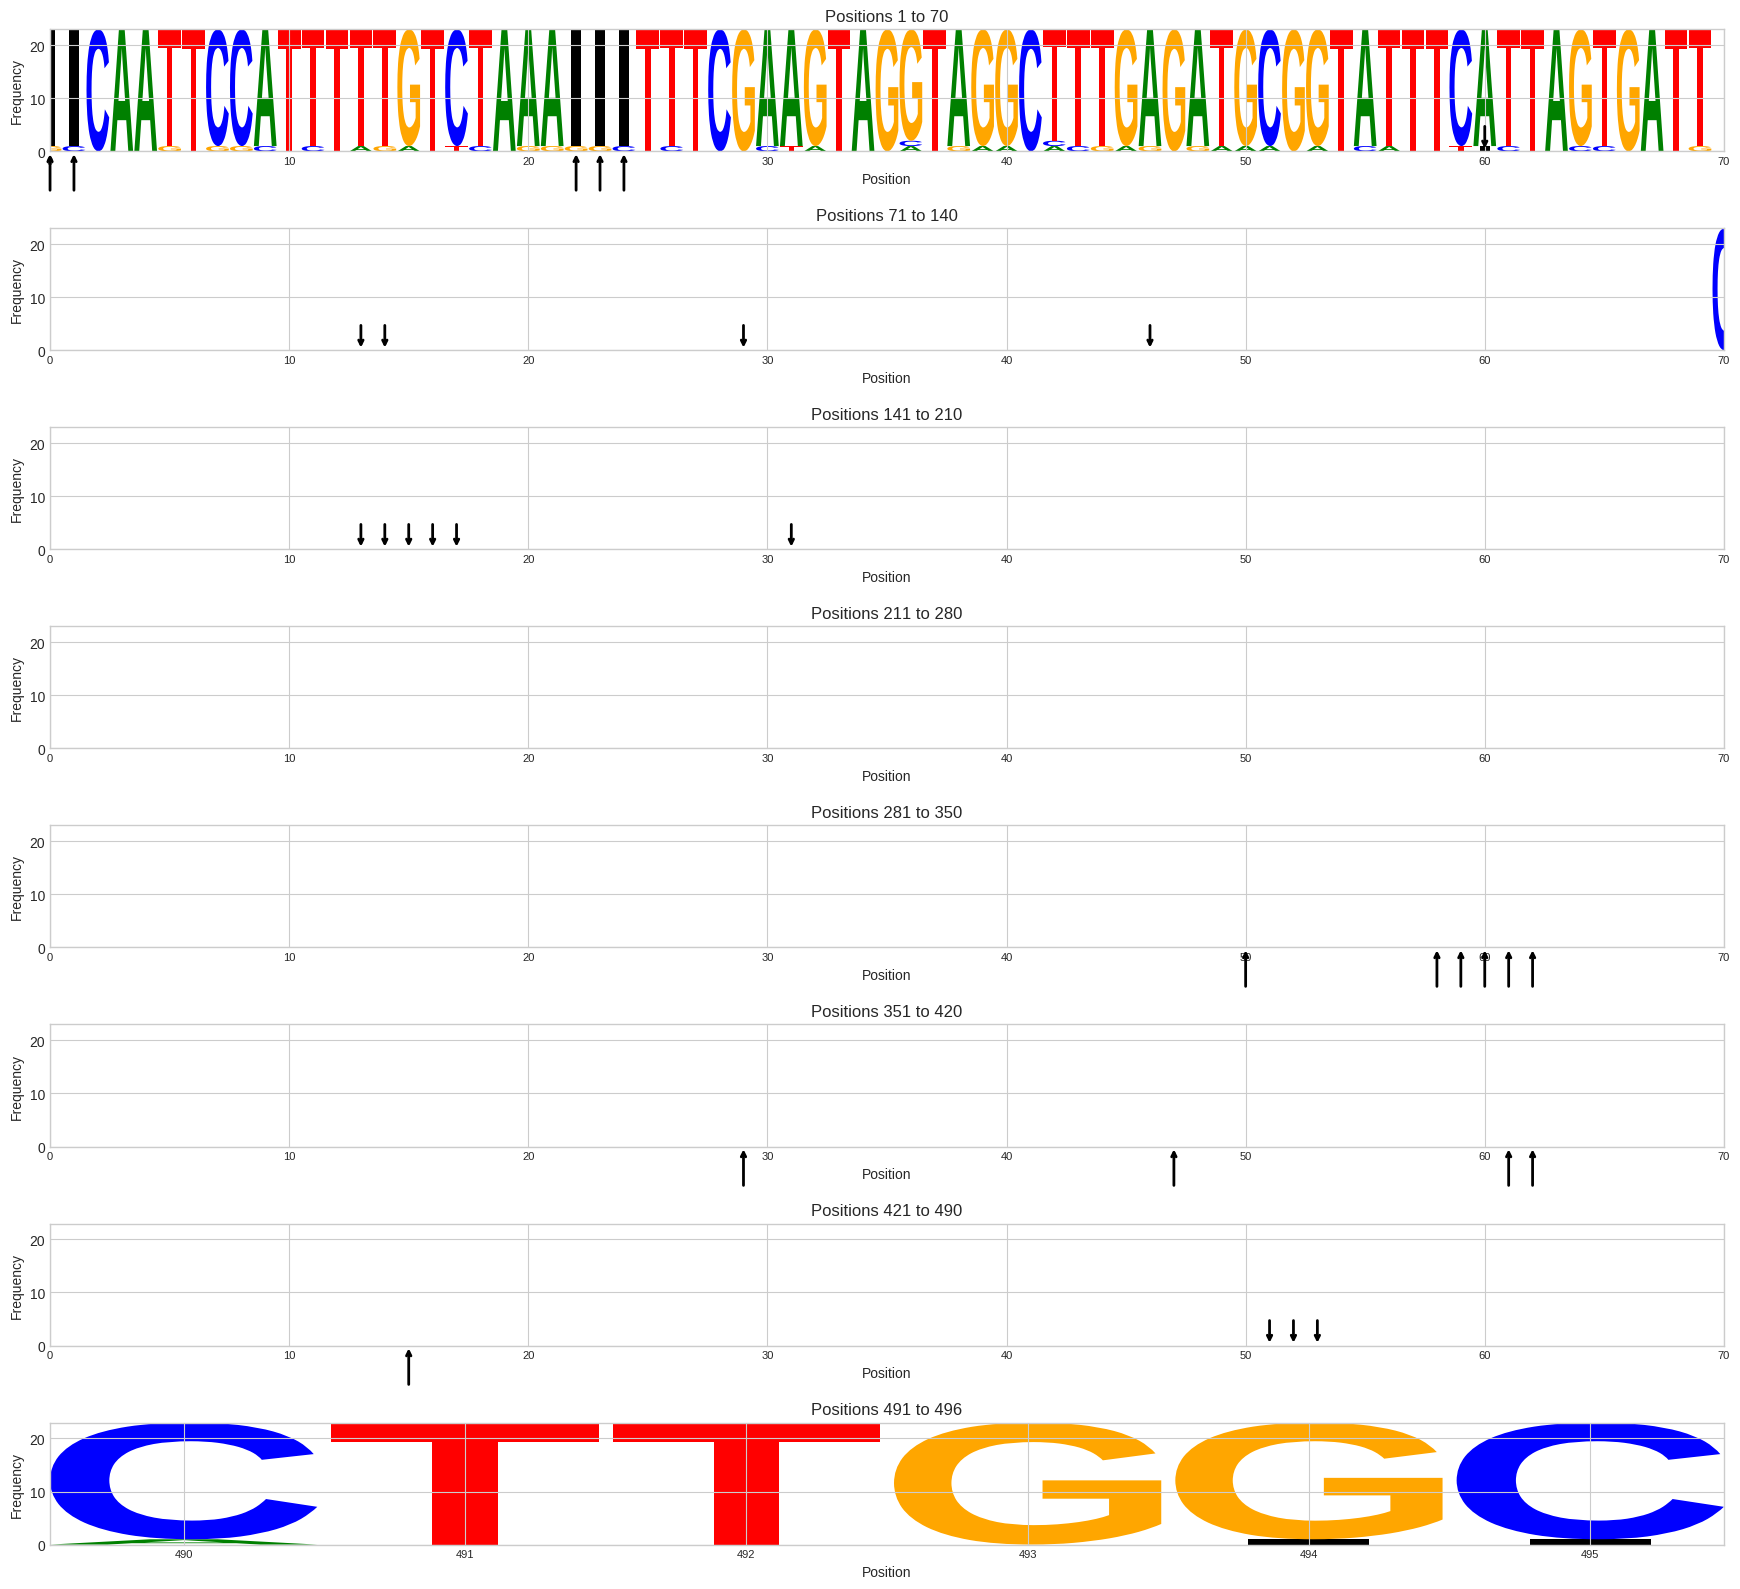

In [18]:
import logomaker
import matplotlib.pyplot as plt

# Define the number of columns (positions) per line
num_cols_per_line = 70

# Calculate the frequency of each base at each position
counts_df = alignment_df.apply(lambda col: col.value_counts(), axis=0).fillna(0)

# Identify the first sequence
first_seq = alignment_df.iloc[0]

# Set up the figure with adjusted width
fig, axes = plt.subplots(num_lines, 1, figsize=(num_cols_per_line * 0.25, num_lines * 2))

for i, ax in enumerate(axes):
    start = i * num_cols_per_line
    end = min(start + num_cols_per_line, alignment_df.shape[1])

    # Generate the sequence logo for this segment
    logo = logomaker.Logo(counts_df.T.iloc[start:end], ax=ax, color_scheme="classic")

    ax.set_title(f"Positions {start + 1} to {end}")
    ax.set_xlabel("Position")
    ax.set_ylabel("Frequency")

    # Set x-axis limits only for full rows
    if end - start == num_cols_per_line:
        ax.set_xlim(0, num_cols_per_line)

    # Adjust font size for clarity
    ax.tick_params(axis='x', labelsize=8)
    ax.tick_params(axis='y', labelsize=10)

    # Annotate insertions and deletions
    for pos in range(start, end):
        ref_base = first_seq.iloc[pos]
        if ref_base == "-":
            # Red arrow for deletions
            ax.annotate("", xy=(pos - start, 0), xytext=(0, 20),
                        textcoords="offset points", ha='center', fontsize=8,
                        arrowprops=dict(facecolor='red', arrowstyle="->", lw=2))
        elif ref_base != "-":
            # Green arrow for insertions
            num_inserts = alignment_df.iloc[:, pos].value_counts().get("-", 0)
            if num_inserts > 0:
                ax.annotate("", xy=(pos - start, 0), xytext=(0, -30),
                            textcoords="offset points", ha='center', fontsize=8,
                            arrowprops=dict(facecolor='green', arrowstyle="->", lw=2))

plt.tight_layout()
plt.savefig("logo_plot.png", dpi=600, bbox_inches='tight')
plt.show()

<ipython-input-12-68c6533b69d7>:18: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


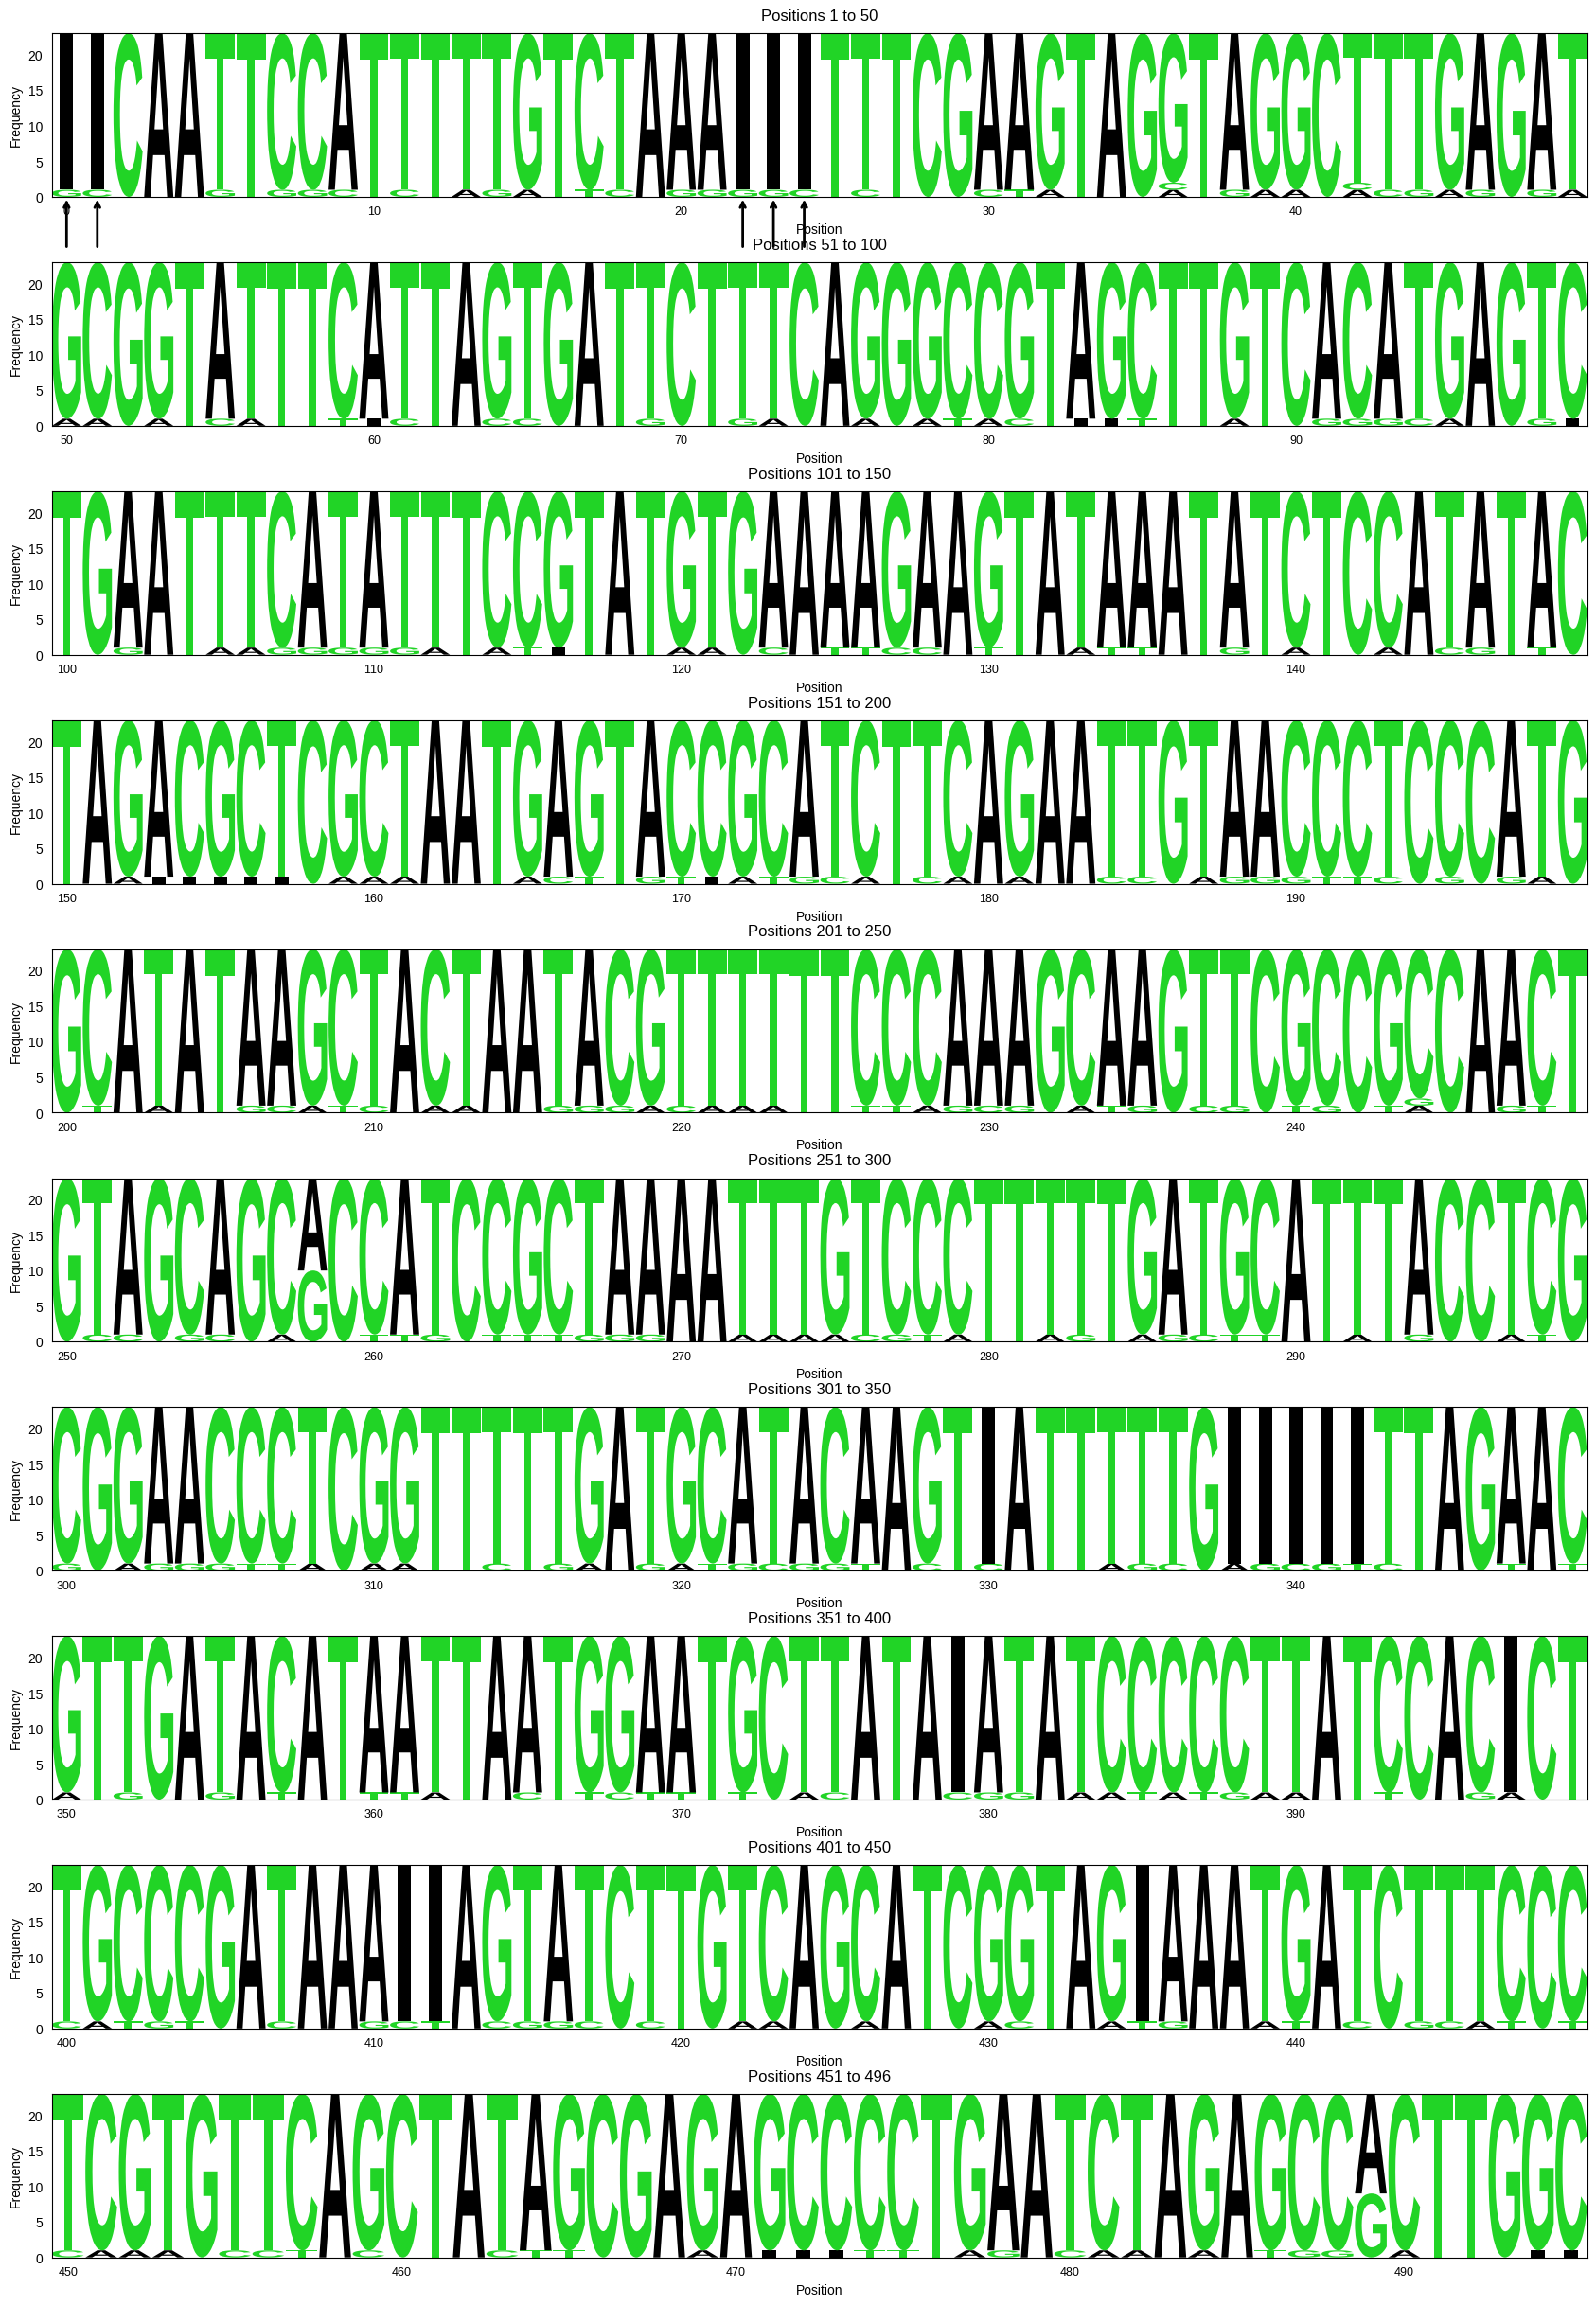

In [12]:
import logomaker
import matplotlib.pyplot as plt

# Define the number of columns (positions) per line
num_cols_per_line = 50

# Calculate the frequency of each base at each position
counts_df = alignment_df.apply(lambda col: col.value_counts(), axis=0).fillna(0)

# Identify the first sequence
first_seq = alignment_df.iloc[0]

# Set up the figure with a larger size for better visualization
num_lines = (alignment_df.shape[1] + num_cols_per_line - 1) // num_cols_per_line
fig, axes = plt.subplots(num_lines, 1, figsize=(num_cols_per_line * 0.35, num_lines * 2.5))

# Set the overall color scheme and style
plt.style.use('seaborn-whitegrid')

for i, ax in enumerate(axes):
    start = i * num_cols_per_line
    end = min(start + num_cols_per_line, alignment_df.shape[1])

    # Generate the sequence logo for this segment
    logomaker.Logo(counts_df.T.iloc[start:end], ax=ax, color_scheme="weblogo_protein")

    ax.set_title(f"Positions {start + 1} to {end}", fontsize=12, pad=10)
    ax.set_xlabel("Position", fontsize=10)
    ax.set_ylabel("Frequency", fontsize=10)

    # Adjust font size and remove excess ticks for a cleaner look
    ax.tick_params(axis='x', labelsize=9)
    ax.tick_params(axis='y', labelsize=10)
    ax.xaxis.set_ticks_position('none')  # Hide x-axis ticks
    ax.yaxis.set_ticks_position('none')  # Hide y-axis ticks

    # Annotate insertions (green arrow) and deletions (red arrow)
    for pos in range(start, end):
        ref_base = first_seq.iloc[pos]
        if ref_base == "-":
            # Red arrow for deletions
            ax.annotate("", xy=(pos - start, 0.02), xytext=(0, 30),
                        textcoords="offset points", ha='center',
                        arrowprops=dict(facecolor='red', arrowstyle="->", lw=2))
        elif ref_base != "-":
            num_inserts = alignment_df.iloc[:, pos].value_counts().get("-", 0)
            if num_inserts > 0:
                # Green arrow for insertions
                ax.annotate("", xy=(pos - start, 0.02), xytext=(0, -40),
                            textcoords="offset points", ha='center',
                            arrowprops=dict(facecolor='green', arrowstyle="->", lw=2))

# Enhance layout and spacing
plt.tight_layout(pad=3.0)
plt.subplots_adjust(hspace=0.4)  # Increase space between rows

plt.show()